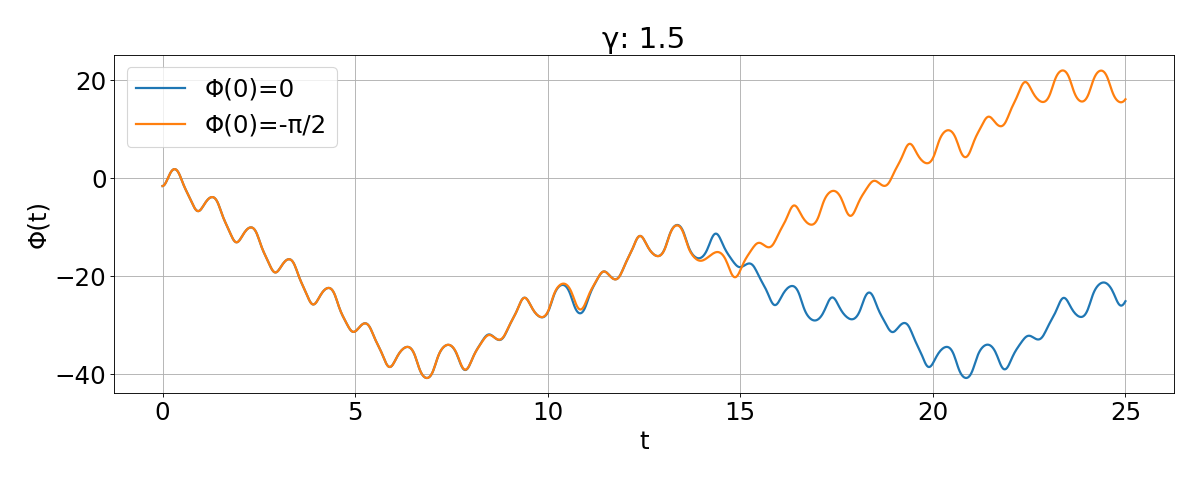

In [14]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

gamma = 1.5
w = 2*np.pi
w0 = 1.5*w
beta = w0/4
def f(u, t, g):
    return (u[1], -2*beta*u[1]-w0**2*np.sin(u[0])+g*w0**2*np.cos(w*t))

phi0 = [-np.pi/2, 0]
ts = np.linspace(0, 25, 1000)
us = odeint(f, phi0, ts, (gamma,))
usd = odeint(f, [-np.pi/2-0.001, 0], ts, (gamma,))
phis = us[:,0]
phisd = usd[:,0]

plt.figure(figsize = (15,6), dpi = 80)

plt.plot(ts, phis, "-", linewidth = 2, label = "Φ(0)=0")
plt.plot(ts, phisd, "-", linewidth = 2, label = "Φ(0)=-π/2")
plt.legend(loc='upper left')

plt.xlabel("t")
plt.ylabel("Φ(t)")
plt.title("γ: " + str(gamma))
plt.grid(True, which = "both")
plt.tight_layout()
plt.show()


plt.close('all')

In [ ]:
gamma_arr = np.arange(1.03, 1.53, 0.0001)
time_arr = np.arange(0, 601, 1)
pts = [[0 for x in range(100)] for y in range(len(gamma_arr))]
x_arr = []
y_arr = []
for g in gamma_arr:
    for i in range(101):
        x_arr.append(g)
    sol = odeint(f, phi0, time_arr, (g,))[500:][:,0]
    y_arr.extend(sol)

In [ ]:
plt.figure(figsize = (15,9), dpi = 80)
plt.plot(x_arr, y_arr, ".", linewidth = 1.0)
plt.xlabel("γ")
plt.ylabel("Φ(t)")
plt.title("t = 500, 501, ..., 600")
plt.grid(True, which = "both")
plt.tight_layout()
plt.show()

plt.close('all')

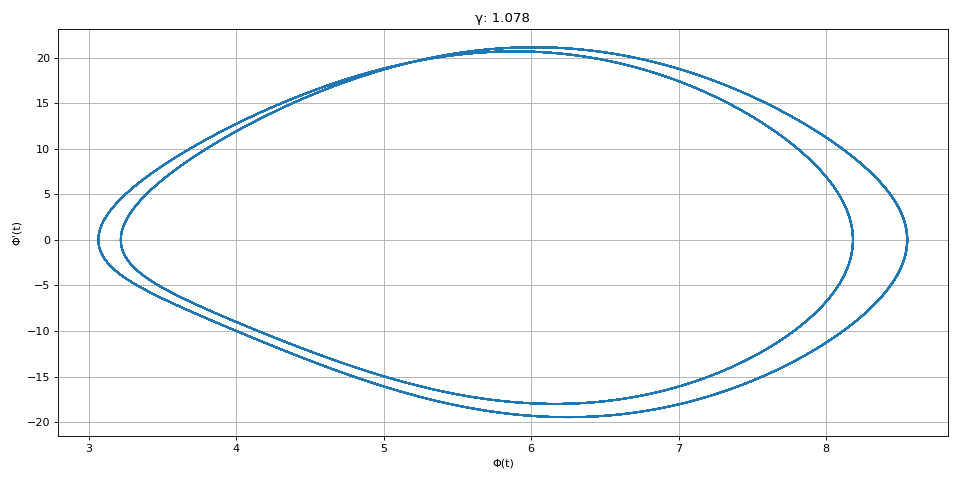

In [120]:
# print(odeint(f, phi0, ts, (0.6,)))
ts = np.linspace(0,60,10000)
gamma = 1.078
phi_arr = odeint(f, [-2*np.pi/2,0], ts, (gamma,))

plt.figure(figsize = (12,6), dpi = 80)

# s = slice(2000, 6000)
plt.plot(phi_arr[3333:,0], phi_arr[3333:,1], "-")
plt.xlabel("Φ(t)")
plt.ylabel("Φ'(t)")
plt.title("γ: " + str(gamma))
plt.grid(True, which = "both")
plt.tight_layout()
plt.show()

plt.close('all')

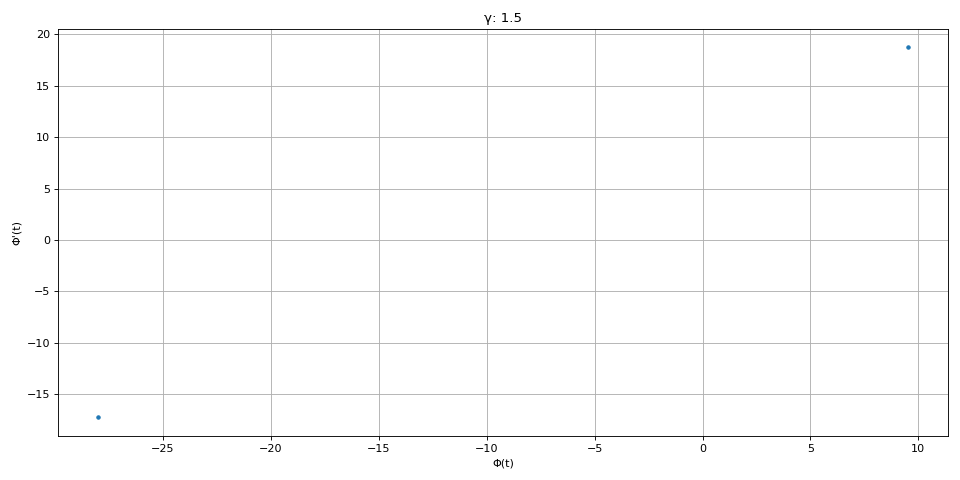

In [147]:
end = 60000
steps = 600000
ts = np.linspace(0,end,steps)

gamma = 1.5
beta = w0/8
phi_arr = odeint(f, [-2*np.pi/2,0], ts, (gamma,))
poincare = []
for i in range(end):
    poincare.append(phi_arr[i*steps//end])

plt.figure(figsize = (12,6), dpi = 80)

s = slice(2800, 20000)
plt.plot(poincare[10:][0], poincare[10:][1], ".")
plt.xlabel("Φ(t)")
plt.ylabel("Φ'(t)")
plt.title("γ: " + str(gamma))
plt.grid(True, which = "both")
plt.tight_layout()
plt.show()

plt.close('all')